In [52]:
import pandas as pd
import numpy as np

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.lines import Line2D
%matplotlib inline

In [11]:
appended_data = []
#change here to switch between before crisis and after crisis
years = list(map(str, range(2003, 2018)))
quarters = [ 'Q1', 'Q2', 'Q3', 'Q4']
for year in years: 
    for quarter in quarters:
        data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")
        print(year + quarter, data2.shape)
        appended_data.append(data2)
        
data = pd.concat(appended_data)
    
# Some basic formating  
data.reset_index(inplace = True)
data.drop('index', axis=1, inplace=True)

2003Q1 (17364, 67)
2003Q2 (23921, 67)


C:\Users\prith\AppData\Local\Temp\ipykernel_30688\3981084180.py:7: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")


2003Q3 (27929, 67)
2003Q4 (17857, 67)
2004Q1 (12137, 67)
2004Q2 (16300, 67)
2004Q3 (12402, 67)
2004Q4 (14121, 67)
2005Q1 (12887, 67)
2005Q2 (17228, 67)


C:\Users\prith\AppData\Local\Temp\ipykernel_30688\3981084180.py:7: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")


2005Q3 (26075, 67)
2005Q4 (25542, 67)
2006Q1 (19104, 67)
2006Q2 (23000, 67)
2006Q3 (21439, 67)
2006Q4 (23838, 67)
2007Q1 (21592, 67)


C:\Users\prith\AppData\Local\Temp\ipykernel_30688\3981084180.py:7: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")


2007Q2 (24627, 67)
2007Q3 (26399, 67)
2007Q4 (38510, 67)
2008Q1 (28258, 67)
2008Q2 (24050, 67)
2008Q3 (17103, 67)
2008Q4 (10973, 67)
2009Q1 (7312, 67)
2009Q2 (6107, 67)
2009Q3 (4373, 67)
2009Q4 (2769, 67)
2010Q1 (2040, 67)
2010Q2 (1732, 67)
2010Q3 (1904, 67)
2010Q4 (2116, 67)
2011Q1 (1665, 67)
2011Q2 (1165, 67)
2011Q3 (1047, 67)
2011Q4 (1185, 67)
2012Q1 (1271, 67)
2012Q2 (1049, 67)
2012Q3 (992, 67)
2012Q4 (1038, 67)
2013Q1 (942, 67)
2013Q2 (996, 67)
2013Q3 (1226, 67)
2013Q4 (1130, 67)
2014Q1 (687, 67)
2014Q2 (799, 67)
2014Q3 (986, 67)
2014Q4 (950, 67)
2015Q1 (838, 67)
2015Q2 (762, 67)
2015Q3 (797, 67)
2015Q4 (743, 67)
2016Q1 (595, 67)
2016Q2 (649, 67)
2016Q3 (758, 67)
2016Q4 (674, 67)
2017Q1 (566, 68)
2017Q2 (633, 68)
2017Q3 (744, 68)
2017Q4 (667, 68)


In [12]:
# Removing all columns which contain more than 90% null values
null_count = data.isnull().sum()
null_columns = null_count[null_count > data.shape[0]*(0.9)]
print(null_columns)
remove_columns = list(set(null_columns.index) - set(['CURR_RATE', 'NON_INTEREST_BEARING_UPB']))
data.drop(remove_columns , axis=1, inplace=True)

SERVICER                                  556563
CURR_RATE                                 538232
LOAN_AGE                                  556563
REM_MONTHS                                556563
ADJ_REM_MONTHS                            556563
MATR_DT                                   556563
PMT_HISTORY                               556563
MOD_FLAG                                  539667
TOT_SCHD_PRNCPL                           538342
NON_INTEREST_BEARING_UPB                  548857
PRINCIPAL_FORGIVENESS_AMOUNT              548652
SERV_IND                                  556563
FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT    548387
FORBEARANCE_INDICATOR                     538189
ADR_TYPE                                  538189
ADR_COUNT                                 555988
ADR_UPB                                   555995
PROPERTY_INSPECTION_WAIVER_INDICATOR      553953
dtype: int64


In [13]:
date_cols = ['ORIG_DATE', 'LAST_PAID_INSTALLMENT_DATE', 'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FIRST_PAY', 'ZB_DTE']
for date_col in date_cols:
    print(date_col)
    data[date_col] = data[date_col].astype('Int64').astype(str)
    data[date_col+'_m'] =  pd.to_numeric(data[date_col].str[:-4], errors='coerce')
    data[date_col+'_y'] =  pd.to_numeric(data[date_col].str[-4:], errors='coerce') 
# dropping the original date columns at the end of macroeconomic variables integration in Model_A2
data.drop(date_cols, axis= 1, inplace=True)

ORIG_DATE
LAST_PAID_INSTALLMENT_DATE
FORECLOSURE_DATE
DISPOSITION_DATE
FIRST_PAY
ZB_DTE


In [14]:
date_colsF= ['ORIG_DATE_m', 'ORIG_DATE_y', 'LAST_PAID_INSTALLMENT_DATE_m',
       'LAST_PAID_INSTALLMENT_DATE_y', 'FORECLOSURE_DATE_m',
       'FORECLOSURE_DATE_y', 'DISPOSITION_DATE_m', 'DISPOSITION_DATE_y', 
      'FIRST_PAY_m', 'FIRST_PAY_y', 'ZB_DTE_m', 'ZB_DTE_y']

for dt_col in date_colsF:
    data[dt_col] = data[dt_col].astype('Int64')

In [15]:
# the columns CURR_RATE and NON_INTEREST_BEARING_UPB have high null value

#The NON_INTEREST_BEARING_UPB can be made zero for Nan value
#Substitute CURR_RATE with Origination_rate
#Substituting Disposition_date with Zero_balance_effective_date
data['NON_INTEREST_BEARING_UPB'] = data['NON_INTEREST_BEARING_UPB'].fillna(0)
data['DISPOSITION_DATE_y'] = data['DISPOSITION_DATE_y'].fillna(data['FORECLOSURE_DATE_y'])

In [16]:
# removing all rows which don't have values for atleast 1 column
#data = data.dropna(subset = ['DISPOSITION_DATE','LAST_PAID_INSTALLMENT_DATE','CURR_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB'])

In [17]:
data['ACCRUED_INT'] =  (data['DISPOSITION_DATE_y'] * 12 + data['DISPOSITION_DATE_m']- \
                    data['LAST_PAID_INSTALLMENT_DATE_y'] * 12 - data['LAST_PAID_INSTALLMENT_DATE_m']) * \
                    (((data['ORIG_RATE'] / 100) - 0.0035) / 12) * (data['LAST_UPB'] - data['NON_INTEREST_BEARING_UPB'])
data['ACCRUED_INT'] = data['ACCRUED_INT'].fillna(0)
data['ACCRUED_INT'] = data['ACCRUED_INT'].apply(lambda x: x if x > 0 else 0)

In [18]:
data[data['ACCRUED_INT'] > 100000][['ACCRUED_INT', 'DISPOSITION_DATE_y', 'DISPOSITION_DATE_m', 'LAST_PAID_INSTALLMENT_DATE_y', 'LAST_PAID_INSTALLMENT_DATE_m', 'LAST_UPB']]

,ACCRUED_INT,DISPOSITION_DATE_y,DISPOSITION_DATE_m,LAST_PAID_INSTALLMENT_DATE_y,LAST_PAID_INSTALLMENT_DATE_m,LAST_UPB
223,129121.852190,2017,5,2008,11,242084.56
1304,104140.136750,2016,6,2010,3,276554.72
1468,109033.388663,2018,10,2012,6,291793.19
1568,106147.259008,2016,7,2009,4,243004.17
1864,131921.338098,2018,7,2007,3,210680.87
...,...,...,...,...,...,...
542447,104043.479467,2021,12,2017,5,515918.08
542497,120456.036090,2021,11,2015,5,475171.74
543845,134241.731985,2023,2,2016,4,459535.24
544846,128272.380720,2021,6,2017,3,685948.56


In [19]:
#Loss calculation
loss_calculation_cols = ['LAST_UPB', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 
               'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
     'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'Zero_Bal_Code']
data[loss_calculation_cols].isnull().sum()

LAST_UPB                                           0
FORECLOSURE_COSTS                              11990
PROPERTY_PRESERVATION_AND_REPAIR_COSTS         61178
ASSET_RECOVERY_COSTS                          109596
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS     31506
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY          40432
NET_SALES_PROCEEDS                             11577
CREDIT_ENHANCEMENT_PROCEEDS                   157398
OTHER_FORECLOSURE_PROCEEDS                    109014
Zero_Bal_Code                                      0
dtype: int64

In [20]:
for col in loss_calculation_cols:
    data[col].fillna(0, inplace=True)
    
data['LOSS'] = (data['LAST_UPB'] \
               +data['FORECLOSURE_COSTS']  \
               +data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'] \
               +data['ASSET_RECOVERY_COSTS']  \
               +data['MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS']  \
               +data['ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY']  \
                +data['ACCRUED_INT'] \
               -data['NET_SALES_PROCEEDS']  \
               -data['CREDIT_ENHANCEMENT_PROCEEDS'] \
               -data['OTHER_FORECLOSURE_PROCEEDS'])
data['LOSS'] = data['LOSS'].round(2)

In [21]:
data['Lossper_GD'] = (data['LOSS']/data['LAST_UPB'])*100

# Exploratory Data analysis

In [28]:
sdata = data[(data['Lossper_GD']>-0.05*10000) & (data['Lossper_GD']<1000)]

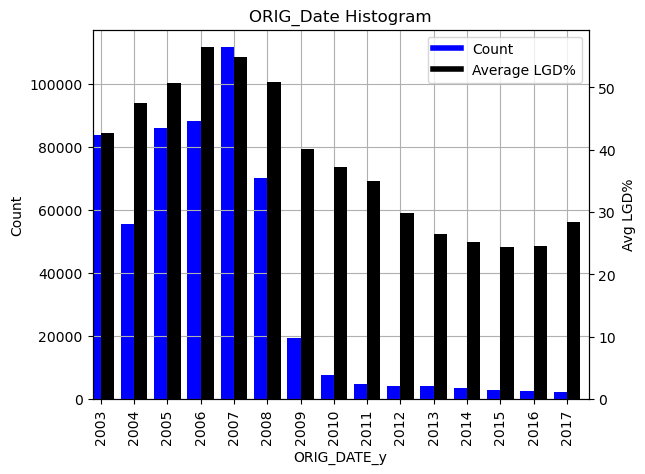

In [56]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
d1 = sdata[sdata['ORIG_DATE_y']>2002]
d1.groupby('ORIG_DATE_y')['Lossper_GD'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
d1.groupby('ORIG_DATE_y')['Lossper_GD'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("ORIG_Date Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'])


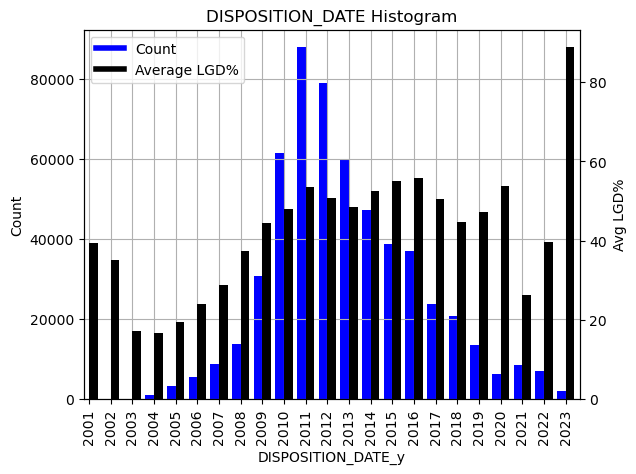

In [58]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('DISPOSITION_DATE_y')['Lossper_GD'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('DISPOSITION_DATE_y')['Lossper_GD'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("DISPOSITION_DATE Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc=2)

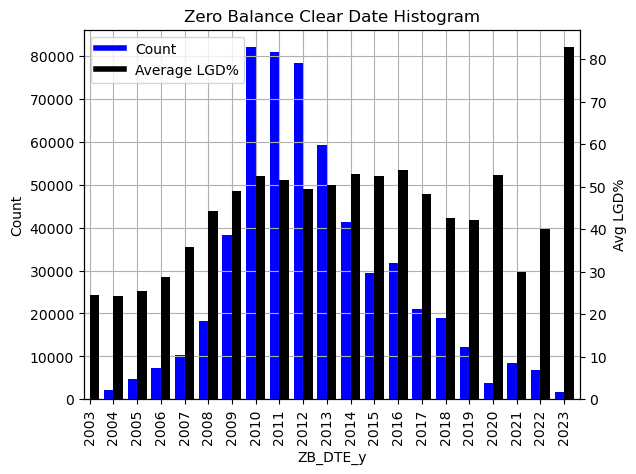

In [59]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('ZB_DTE_y')['Lossper_GD'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('ZB_DTE_y')['Lossper_GD'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("Zero Balance Clear Date Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc=2)

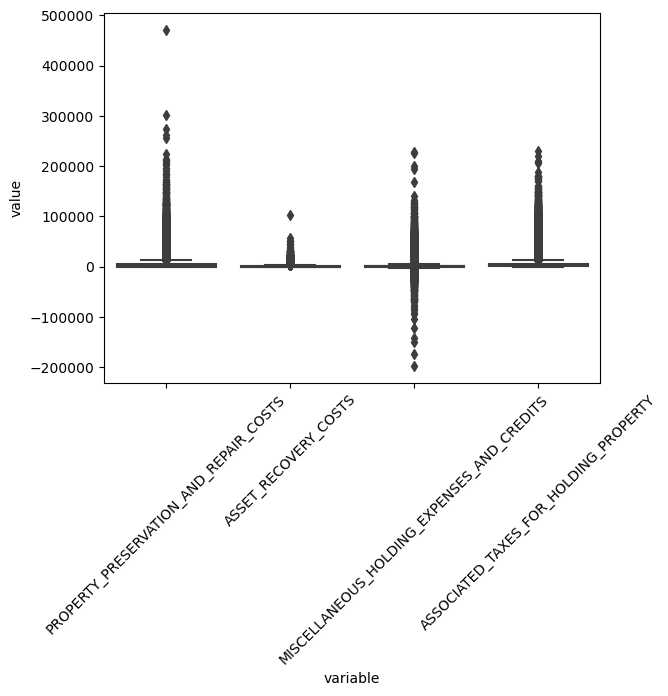

In [32]:
cols1 = ['PROPERTY_PRESERVATION_AND_REPAIR_COSTS','ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY']
Box_data = data[cols1]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Box_data))
ax.set_xticklabels(cols1, rotation=45)

plt.show()
# MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS have some negetive values!

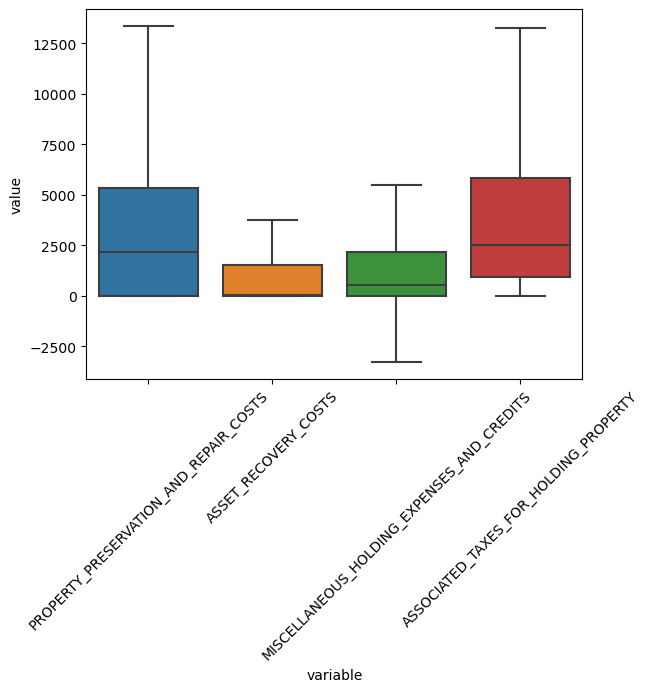

In [33]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Box_data), showfliers=False)
ax.set_xticklabels(cols1, rotation=45)

plt.show()

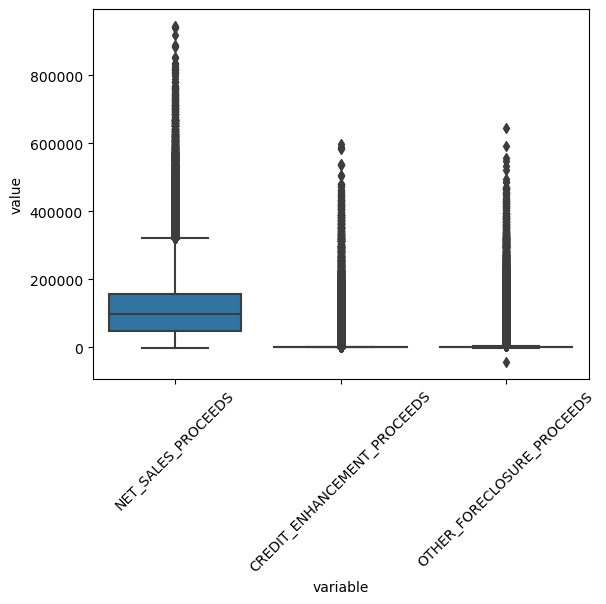

In [34]:
cols2 = ['NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS','OTHER_FORECLOSURE_PROCEEDS']
Box_data = data[cols2]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Box_data))
ax.set_xticklabels(cols2, rotation=45)

plt.show()

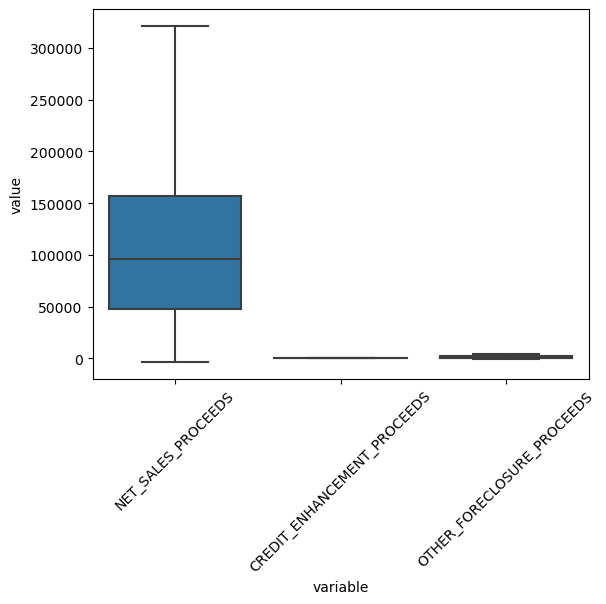

In [35]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Box_data), showfliers=False)
ax.set_xticklabels(cols2, rotation=45)

plt.show()

In [36]:
#plotting the class distribution of the categorical variables
col_types = data.dtypes
list(col_types[col_types == 'object'].index)

['CHANNEL',
 'SELLER',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'OCC_STAT',
 'STATE',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'DLQ_STATUS',
 'HOMEREADY_PROGRAM_INDICATOR',
 'RELOCATION_MORTGAGE_INDICATOR',
 'HIGH_BALANCE_LOAN_INDICATOR',
 'HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR',
 'RE_PROCS_FLAG']

In [37]:
series_SELLER = data.SELLER.str.replace('[^\w\s]','')
series_SELLER = series_SELLER.str.lower()

C:\Users\prith\AppData\Local\Temp\ipykernel_30688\1710896913.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  series_SELLER = data.SELLER.str.replace('[^\w\s]','')


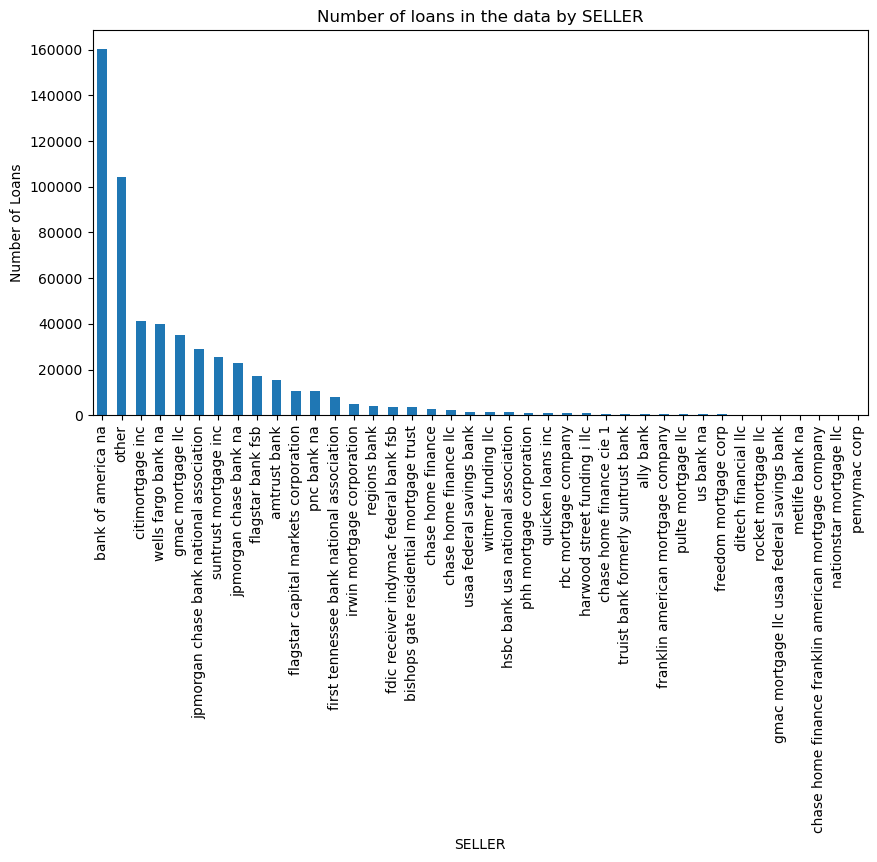

In [38]:
#series_SELLER = data.SELLER
series_SELLER.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of loans in the data by SELLER")
plt.ylabel('Number of Loans')
plt.xlabel('SELLER');

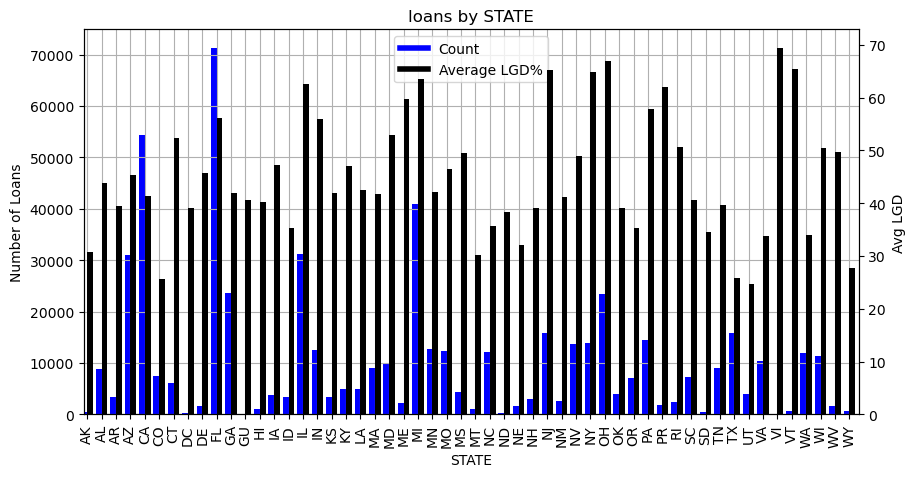

In [62]:
#data.groupby('STATE')['Lossper_GD'].count().nlargest(40).plot(kind='bar', color='black')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('STATE')['Lossper_GD'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('STATE')['Lossper_GD'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Loans')
ax.grid() 

ax2.set_ylabel('Avg LGD')
plt.title("loans by STATE")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc =9)

Text(0.5, 1.0, 'loans by by PURPOSE')

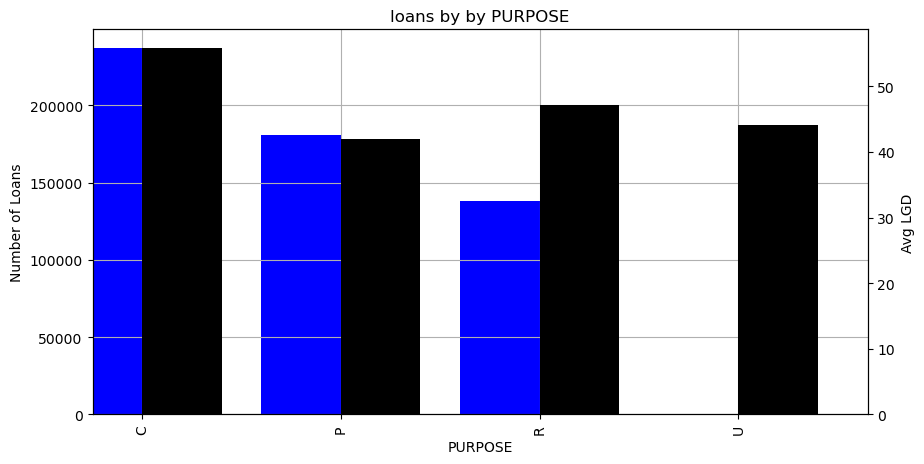

In [45]:
'''data.PURPOSE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of loans in the data by PURPOSE")
plt.ylabel('Number of Loans')
plt.xlabel('PURPOSE')'''

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('PURPOSE')['Lossper_GD'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('PURPOSE')['Lossper_GD'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Loans')
ax.grid() 

ax2.set_ylabel('Avg LGD')
plt.title("loans by by PURPOSE")

Text(0.5, 1.0, 'Loss Histogram')

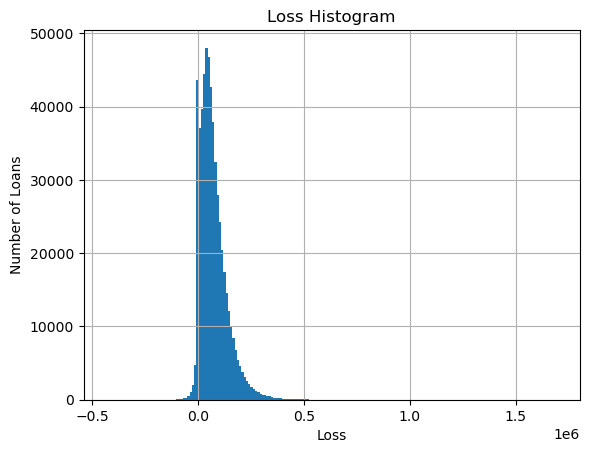

In [48]:
y_series = sdata['LOSS']  #data[(data['LOSS']<1000000) & (data['LOSS']>-0.05*1000000)]

y_series.hist(bins=200)
plt.ylabel('Number of Loans')

plt.xlabel('Loss')
plt.title("Loss Histogram")

Text(0.5, 1.0, 'LGD Histogram')

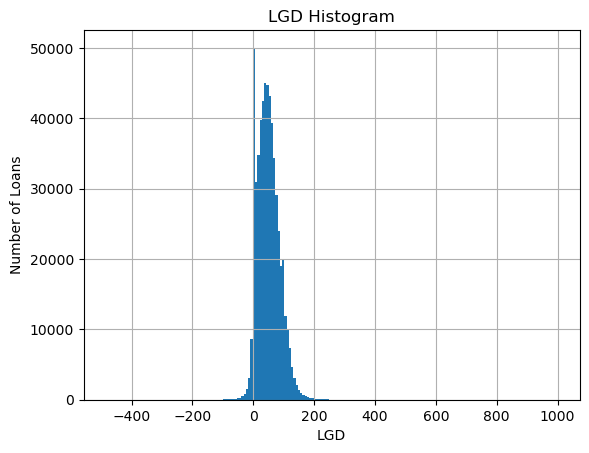

In [46]:
y_series = sdata['Lossper_GD']
y_series.hist(bins=200)

plt.ylabel('Number of Loans')

plt.xlabel('LGD')
plt.title("LGD Histogram")

Numerical columns analysis

In [98]:
col_types = data.dtypes
numerical_cols = list(col_types[col_types != 'object'].index)
numerical_cols

['index',
 'LOAN_ID',
 'ACT_PERIOD',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'FIRST_PAY',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'NO_UNITS',
 'MSA',
 'ZIP',
 'MI_PCT',
 'Zero_Bal_Code',
 'LAST_UPB',
 'TOT_SCHD_PRNCPL',
 'FORECLOSURE_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
 'OTHER_FORECLOSURE_PROCEEDS',
 'NON_INTEREST_BEARING_UPB',
 'PRINCIPAL_FORGIVENESS_AMOUNT',
 'MI_TYPE',
 'FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT',
 'FORBEARANCE_INDICATOR',
 'ADR_COUNT',
 'ADR_UPB']

In [90]:
#these are non numerical columns with integer or float type
non_num_cols = ['LOAN_ID','ACT_PERIOD', 'ORIG_DATE','ZIP', 'Zero_Bal_Code', 'FORECLOSURE_DATE', 
                'MI_TYPE', 'HOMEREADY_PROGRAM_INDICATOR', 'FORBEARANCE_INDICATOR', 'ADR_COUNT', 'LAST_UPB']
dependency_columns = ['INT_COST', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS' ,
     'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 
        'PRINCIPAL_FORGIVENESS_AMOUNT',  'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS']

data[non_num_cols].tail(10)

,LOAN_ID,ACT_PERIOD,ORIG_DATE,ZIP,Zero_Bal_Code,FORECLOSURE_DATE,MI_TYPE,HOMEREADY_PROGRAM_INDICATOR,FORBEARANCE_INDICATOR,ADR_COUNT,LAST_UPB
570028,984836055308,122022,102017,18.0,2.0,122022.0,NaN,7,7.0,NaN,260572.38
570029,986762956810,112022,92017,76.0,15.0,112022.0,1.0,7,7.0,NaN,354280.70
570030,990457988561,82020,102017,206.0,3.0,82020.0,1.0,H,7.0,NaN,333540.06
570031,992801668075,32023,112017,613.0,9.0,32023.0,1.0,H,7.0,NaN,38188.08
570032,993420696864,12019,102017,936.0,2.0,12019.0,NaN,7,NaN,NaN,231843.69
570033,995051434481,102021,102017,442.0,9.0,102021.0,1.0,H,7.0,NaN,151906.23
570034,995555108801,32020,82017,277.0,9.0,32020.0,NaN,7,NaN,NaN,97329.06
570035,995755646990,92020,82017,611.0,2.0,32020.0,1.0,7,7.0,NaN,56396.83
570036,996967690678,52019,82017,460.0,9.0,52019.0,1.0,F,NaN,NaN,104760.00
570037,999810995572,92022,112017,782.0,2.0,92022.0,1.0,7,7.0,NaN,259316.66


In [96]:
data[['LAST_UPB', 'CURRENT_UPB']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570038 entries, 0 to 570037
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LAST_UPB     570038 non-null  float64
 1   CURRENT_UPB  570038 non-null  float64
dtypes: float64(2)
memory usage: 8.7 MB


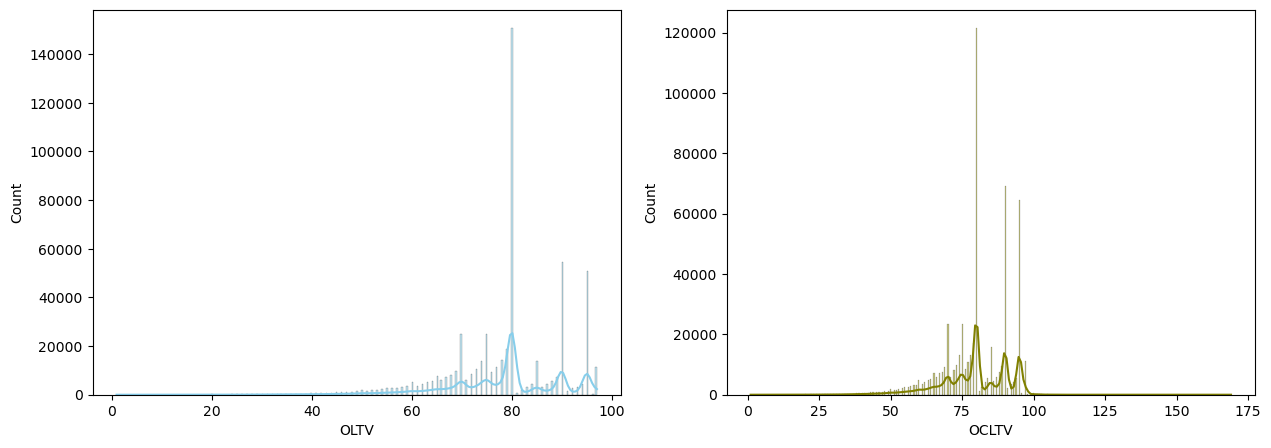

In [100]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,2, figsize=(15, 5))
      
sns.histplot(data= data, x="OLTV", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="OCLTV", kde=True, color="olive", ax=axs[1])

plt.show()

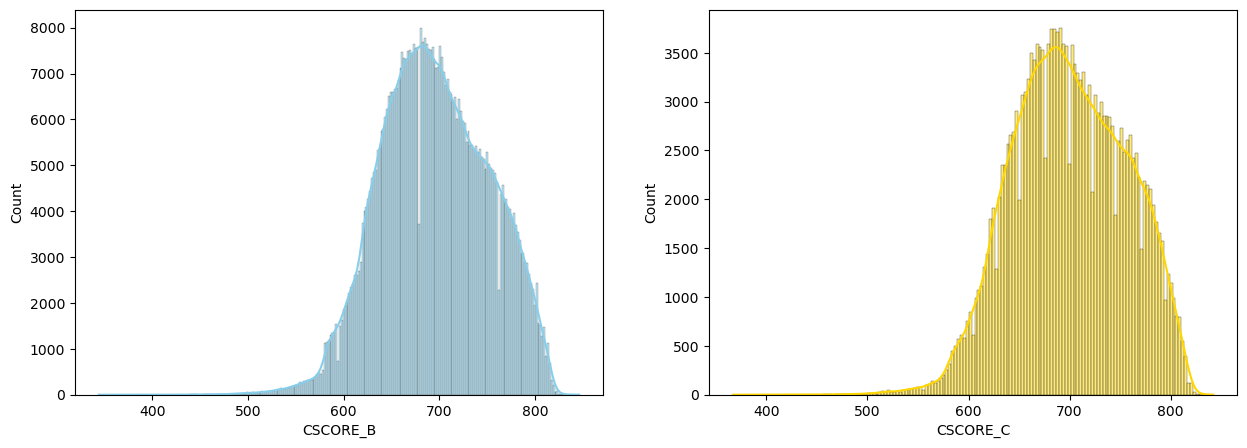

In [108]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,2, figsize=(15, 5))
      
sns.histplot(data= data, x="CSCORE_B", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="CSCORE_C", kde=True, color="gold", ax=axs[1])
plt.show()

In [126]:
summary = data[process_numerical_cols].describe().T
summary['std']/summary['mean']

index                                      0.749619
ORIG_RATE                                  0.114252
CURR_RATE                                  0.224447
ORIG_UPB                                   0.552174
CURRENT_UPB                                     NaN
ORIG_TERM                                  0.138462
FIRST_PAY                                  0.505393
OLTV                                       0.152054
OCLTV                                      0.153676
NUM_BO                                     0.356722
DTI                                        0.299107
CSCORE_B                                   0.080417
CSCORE_C                                   0.079311
NO_UNITS                                   0.242285
MSA                                        0.521295
MI_PCT                                     0.280719
TOT_SCHD_PRNCPL                           18.402802
REPURCHASES_MAKE_WHOLE_PROCEEDS            3.943074
NON_INTEREST_BEARING_UPB                   2.238269
FORECLOSURE_

In [128]:
no_variance = ['CURRENT_UPB']

In [129]:
process_numerical_cols = [x for x in numerical_cols if x not in non_num_cols+dependency_columns+no_variance]

<AxesSubplot:>

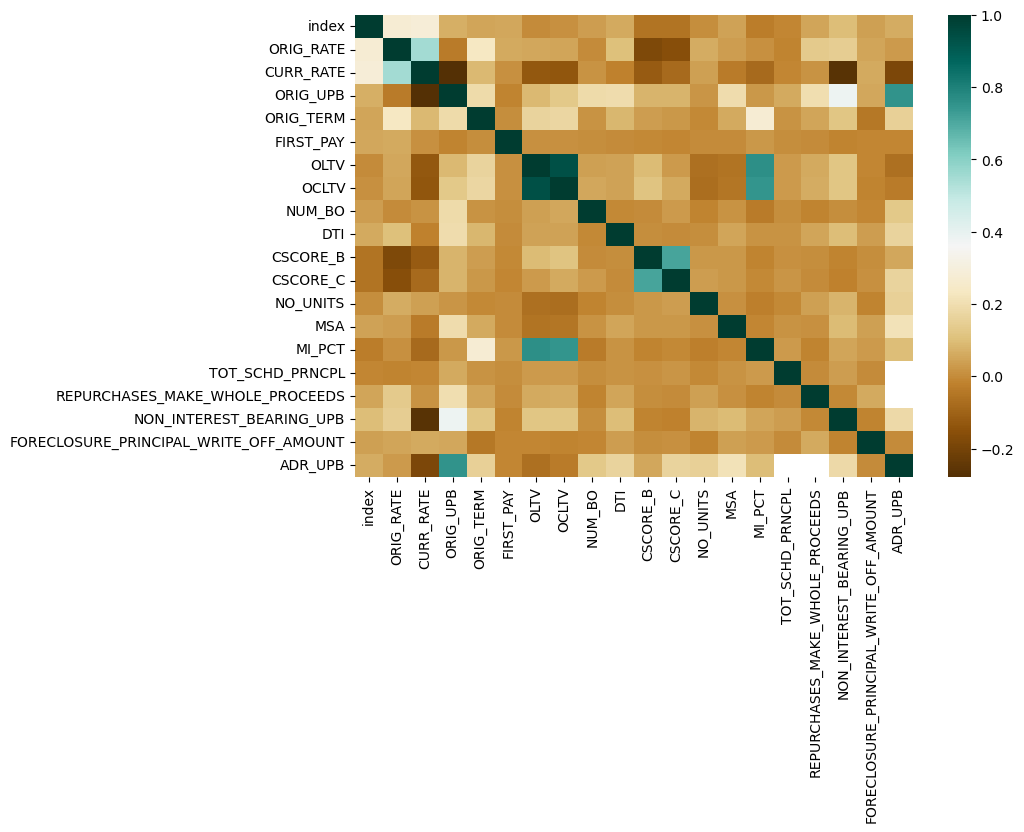

In [130]:
plt.figure(figsize=(9,6))

c= data[process_numerical_cols].corr()
sns.heatmap(c,cmap="BrBG",fmt='.3g')


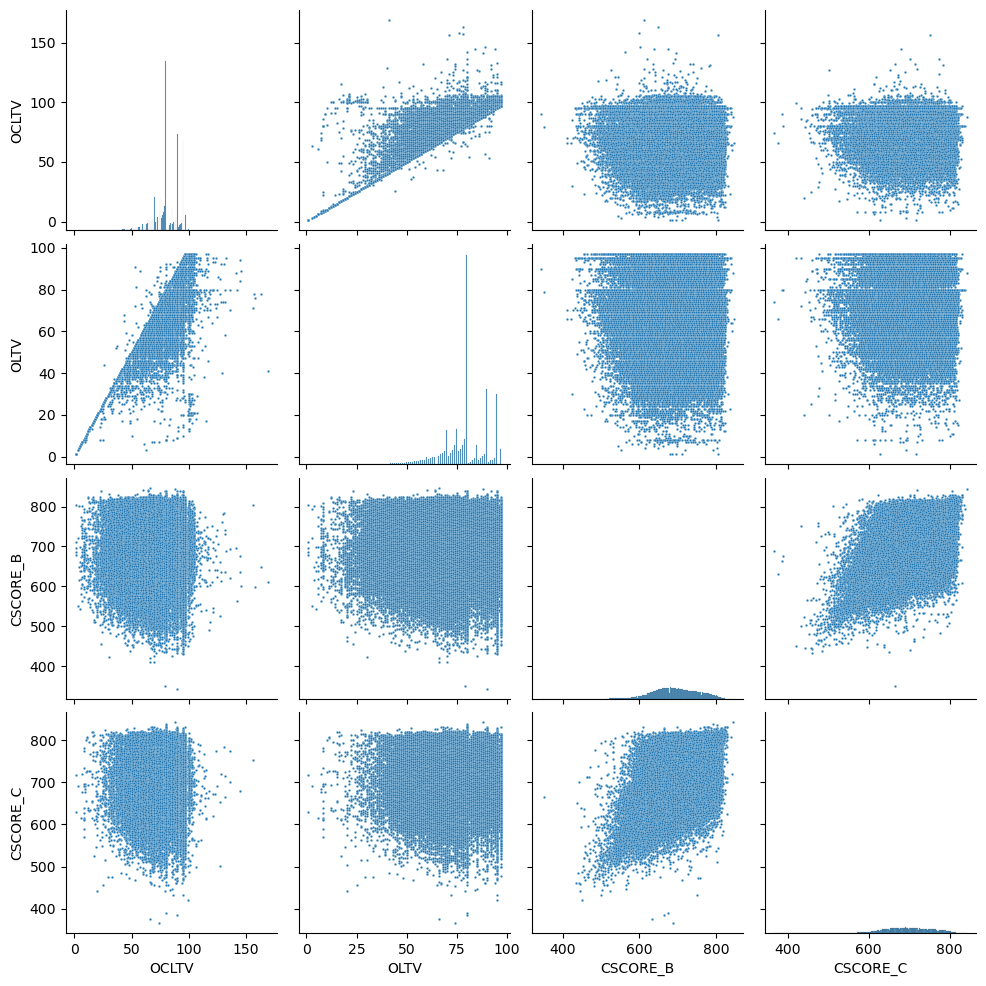

In [135]:
sns.pairplot(data[['OCLTV', 'OLTV', 'CSCORE_B', 'CSCORE_C']], plot_kws={"s": 3})

C:\Users\prith\AppData\Local\Temp\ipykernel_30688\859783951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['ORIG_RATE_'] = sdata['ORIG_RATE'].round(1)


Text(0, 0.5, 'LGD')

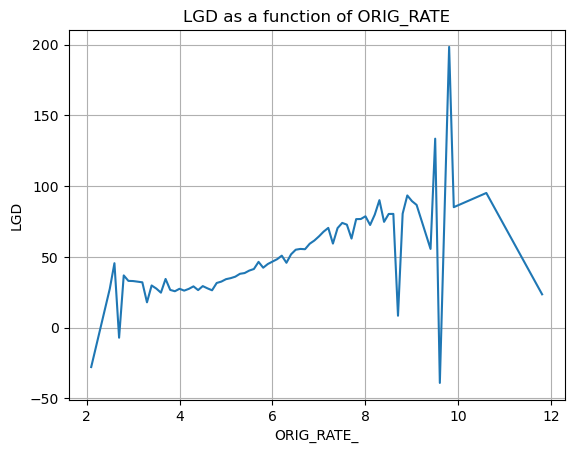

In [100]:
#sdata['MI_PCT'] = (sdata['ORIG_RATE']//10)*10
sdata['ORIG_RATE_'] = sdata['ORIG_RATE'].round(1)
plot_1 = sdata.groupby('ORIG_RATE_', as_index=False)['Lossper_GD'].mean()
plot_1.index = plot_1.ORIG_RATE_
plot_1['Lossper_GD'].plot(grid=True)
plt.title('LGD as a function of ORIG_RATE')
plt.ylabel('LGD')

In [65]:
sdata['OLTV'].unique()

array([60., 90., 75., 97., 67., 69., 93., 70., 58., 66., 80., 94., 79.,
       78., 71., 73., 74., 76., 40., 68., 86., 95., 85., 61., 50., 64.,
       63., 72., 54., 12., 42., 44., 77., 65., 83., 28., 84., 43., 82.,
       52., 53., 92., 46., 62., 81., 48., 91., 59., 87., 88., 56., 89.,
       57., 55., 51., 32., 15., 31., 47., 26., 96., 16., 41., 38., 45.,
       49., 34.,  9., 30., 36., 18., 35., 39., 17., 19., 29., 37., 27.,
       22., 33., 20., 21.,  8., 11., 24., 23.,  5., 13., 14., 10.,  7.,
       25.,  6.,  1.,  4.,  3.])